In [1]:
import pandas as pd


In [2]:

# Chargement des données des prénoms
df_prenoms = pd.read_csv('/Users/anthonyivanier/Desktop/Ensae/3A/NLP/firstname_with_sex.csv', sep=';')

# Chargement des transcriptions
df_transcriptions = pd.read_csv('/Users/anthonyivanier/Desktop/Ensae/3A/NLP/transcriptions_with_sex.csv')


In [3]:
df_prenoms.head()


,firstname,male,female
0,marie,10145,2390322
1,jean,1869615,6476
2,pierre,1475841,5047
3,jeanne,1765,1097397
4,françois,1089009,5951


In [4]:
print(df_prenoms.shape , df_transcriptions.shape)

(6946, 3) (241, 4)


In [5]:
df_transcriptions.head()


,subject_line,groundtruth,prediction,sex
0,ebb26ada-044c-4c62-9dbc-a9c8d505d31c,surname: Chardon firstname: Marie occupation: ...,nom: Chardon prénom: Marie date_naissance: 30 ...,femme
1,338496f5-e4ca-43ac-aa5c-429cb3f6ac00,surname: Lhopital firstname: Louis-Jean occupa...,nom: Lhopital prénom: Louis Jean date_naissanc...,homme
2,e6a279da-9b6f-4f49-b498-64857bc50d1e,surname: Papin firstname: Marie occupation: id...,nom: Pyrin prénom: Marie date_naissance: 55 re...,femme
3,7534deca-39e8-4f00-be17-c12460015de1,surname: Lavocat firstname: Marie link: femme ...,nom: Lavocat prénom: Marie date_naissance: 187...,femme
4,ef334a66-a504-418a-9872-e7c9db923488,surname: Benne firstname: Marguerite age: 78,nom: Benne prénom: Marguerite date_naissance: ...,femme


In [6]:

# Set the display option to print the entire line
pd.set_option('display.max_colwidth', None)

# Print the first line of df_transcriptions
df_transcriptions.iloc[0,:]


subject_line                                       ebb26ada-044c-4c62-9dbc-a9c8d505d31c
groundtruth     surname: Chardon firstname: Marie occupation: idem link: fille age: 30 
prediction            nom: Chardon prénom: Marie date_naissance: 30 lieux_naissance: " 
sex                                                                               femme
Name: 0, dtype: object

In [7]:
# Probalité des sexes des prénoms
df_prenoms['total'] = df_prenoms['male'] + df_prenoms['female']
df_prenoms['gender_probability'] = df_prenoms['female'] / df_prenoms['total']

In [8]:
def extract_firstname(text):
    # Extraction du prénom à partir de la colonne groundtruth ou prediction
    parts = text.split()
    for i, part in enumerate(parts):
        if part in ["firstname:", "prénom:"]:
            return parts[i+1]  # Retourne le prénom qui suit ces indicateurs
    return None

df_transcriptions['extracted_firstname'] = df_transcriptions['groundtruth'].apply(extract_firstname)
df_transcriptions['extracted_firstname'] = df_transcriptions['extracted_firstname'].str.lower()


# Standardisation de la colonne 'sex' en binaire
df_transcriptions['sex_binary'] = df_transcriptions['sex'].apply(lambda x: 1 if x == 'femme' else 0)


In [9]:
df_transcriptions.head()

,subject_line,groundtruth,prediction,sex,extracted_firstname,sex_binary
0,ebb26ada-044c-4c62-9dbc-a9c8d505d31c,surname: Chardon firstname: Marie occupation: idem link: fille age: 30,"nom: Chardon prénom: Marie date_naissance: 30 lieux_naissance: """,femme,marie,1
1,338496f5-e4ca-43ac-aa5c-429cb3f6ac00,surname: Lhopital firstname: Louis-Jean occupation: sp link: chef age: 67,nom: Lhopital prénom: Louis Jean date_naissance: 67 lieux_naissance: Sn employeur: ahef,homme,louis-jean,0
2,e6a279da-9b6f-4f49-b498-64857bc50d1e,surname: Papin firstname: Marie occupation: idem link: idem employer: idem age: 15,nom: Pyrin prénom: Marie date_naissance: 55 relation: d,femme,marie,1
3,7534deca-39e8-4f00-be17-c12460015de1,surname: Lavocat firstname: Marie link: femme birth_date: 1875 lob: Rigny,nom: Lavocat prénom: Marie date_naissance: 1875 lieux_naissance: Rigny profession: '',femme,marie,1
4,ef334a66-a504-418a-9872-e7c9db923488,surname: Benne firstname: Marguerite age: 78,nom: Benne prénom: Marguerite date_naissance: 78 lieux_naissance: id relation: '',femme,marguerite,1


In [10]:
# Fusion basée sur les prénoms extraits
df_combined = pd.merge(df_transcriptions,
                       df_prenoms[['firstname', 'gender_probability']],
                       left_on='extracted_firstname',
                       right_on='firstname',
                       how='left')




In [11]:
df_combined.head()

,subject_line,groundtruth,prediction,sex,extracted_firstname,sex_binary,firstname,gender_probability
0,ebb26ada-044c-4c62-9dbc-a9c8d505d31c,surname: Chardon firstname: Marie occupation: idem link: fille age: 30,"nom: Chardon prénom: Marie date_naissance: 30 lieux_naissance: """,femme,marie,1,marie,0.995774
1,338496f5-e4ca-43ac-aa5c-429cb3f6ac00,surname: Lhopital firstname: Louis-Jean occupation: sp link: chef age: 67,nom: Lhopital prénom: Louis Jean date_naissance: 67 lieux_naissance: Sn employeur: ahef,homme,louis-jean,0,NaN,NaN
2,e6a279da-9b6f-4f49-b498-64857bc50d1e,surname: Papin firstname: Marie occupation: idem link: idem employer: idem age: 15,nom: Pyrin prénom: Marie date_naissance: 55 relation: d,femme,marie,1,marie,0.995774
3,7534deca-39e8-4f00-be17-c12460015de1,surname: Lavocat firstname: Marie link: femme birth_date: 1875 lob: Rigny,nom: Lavocat prénom: Marie date_naissance: 1875 lieux_naissance: Rigny profession: '',femme,marie,1,marie,0.995774
4,ef334a66-a504-418a-9872-e7c9db923488,surname: Benne firstname: Marguerite age: 78,nom: Benne prénom: Marguerite date_naissance: 78 lieux_naissance: id relation: '',femme,marguerite,1,marguerite,0.998233


In [12]:
# nombre de nan dans first name
df_combined['firstname'].isna().sum()

9

In [13]:
df_combined.shape

(241, 8)

In [14]:
# Première modélisation

from sklearn.model_selection import train_test_split


X = df_combined[['gender_probability']]  
y = df_combined['sex_binary']

# Division en ensembles d'entraînement et de test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
df_combined['gender_probability']

0      0.995774
1           NaN
2      0.995774
3      0.995774
4      0.998233
         ...   
236    0.997709
237    0.004556
238    0.998233
239    0.004232
240    0.997834
Name: gender_probability, Length: 241, dtype: float64

In [16]:
# Predict gender based on gender probability
df_combined['predicted_gender_proba_only'] = df_combined['gender_probability'].apply(lambda x: 1 if x > 0.5 else 0)

# Compute accuracy
accuracy = (df_combined['predicted_gender_proba_only'] == df_combined['sex_binary']).mean()
print("Baseline accuracy:", accuracy)

# Accuracy is 0.975 with the baseline. Let's try to improve it with a more complex model by taking into account other data.


Baseline accuracy: 0.975103734439834


In [17]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset
import torch
from sklearn.model_selection import train_test_split

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Tokenisation et préparation des données pour le modèle
class GenderPredictionDataset(Dataset):
    def __init__(self, texts, labels, tokenizer):
        self.tokenizer = tokenizer
        self.texts = texts
        self.labels = labels
    
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = self.texts[idx]
        labels = self.labels[idx]
        encoding = self.tokenizer(text, return_tensors='pt', padding='max_length', truncation=True, max_length=512)
        
        # Important: Convert 'BatchEncoding' to a more usable format
        input_ids = encoding['input_ids'].squeeze()  # Remove batch dimension
        attention_mask = encoding['attention_mask'].squeeze() # Remove batch dimension
        
        return {'input_ids': input_ids, 'attention_mask': attention_mask, 'labels': torch.tensor(labels)}

# Preparation des données
texts = df_combined['prediction'].tolist()
labels = df_combined['sex_binary'].tolist()

# Division en ensembles d'entraînement et de test
texts_train, texts_test, labels_train, labels_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Création des datasets
train_dataset = GenderPredictionDataset(texts_train, labels_train, tokenizer)
test_dataset = GenderPredictionDataset(texts_test, labels_test, tokenizer)



/Users/anthonyivanier/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [18]:
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    evaluation_strategy='epoch'
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

trainer.train()



Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_transform.bias', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'pre_classifier.weight', 'classifi

{'eval_loss': 0.6939376592636108, 'eval_runtime': 5.6103, 'eval_samples_per_second': 8.734, 'eval_steps_per_second': 1.248, 'epoch': 1.0}


 67%|██████▋   | 48/72 [02:51<01:22,  3.43s/it]***** Running Evaluation *****
  Num examples = 49
  Batch size = 8
                                               
 67%|██████▋   | 48/72 [02:57<01:22,  3.43s/it]

{'eval_loss': 0.6911244988441467, 'eval_runtime': 5.6169, 'eval_samples_per_second': 8.724, 'eval_steps_per_second': 1.246, 'epoch': 2.0}


100%|██████████| 72/72 [04:21<00:00,  3.53s/it]***** Running Evaluation *****
  Num examples = 49
  Batch size = 8
                                               
100%|██████████| 72/72 [04:26<00:00,  3.53s/it]

Training completed. Do not forget to share your model on huggingface.co/models =)


100%|██████████| 72/72 [04:26<00:00,  3.71s/it]

{'eval_loss': 0.6831199526786804, 'eval_runtime': 5.6784, 'eval_samples_per_second': 8.629, 'eval_steps_per_second': 1.233, 'epoch': 3.0}
{'train_runtime': 266.9419, 'train_samples_per_second': 2.158, 'train_steps_per_second': 0.27, 'train_loss': 0.6858603689405653, 'epoch': 3.0}


TrainOutput(global_step=72, training_loss=0.6858603689405653, metrics={'train_runtime': 266.9419, 'train_samples_per_second': 2.158, 'train_steps_per_second': 0.27, 'train_loss': 0.6858603689405653, 'epoch': 3.0})

In [19]:
evaluation_results = trainer.evaluate(test_dataset)
print(evaluation_results)

***** Running Evaluation *****
  Num examples = 49
  Batch size = 8
100%|██████████| 7/7 [00:04<00:00,  1.44it/s]

{'eval_loss': 0.6831199526786804, 'eval_runtime': 5.811, 'eval_samples_per_second': 8.432, 'eval_steps_per_second': 1.205, 'epoch': 3.0}


***** Running Prediction *****
  Num examples = 49
  Batch size = 8
100%|██████████| 7/7 [00:04<00:00,  1.47it/s]


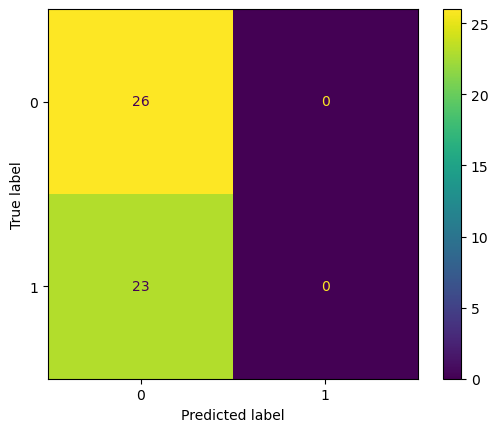

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you have your test labels and predictions
predictions = trainer.predict(test_dataset)
predicted_labels = predictions.predictions.argmax(axis=1)

cm = confusion_matrix(labels_test, predicted_labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
